In [1]:
import os
import pandas as pd
import glob
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import pdb
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes #hold



In [2]:
####################################################
## import the experimental values
# set paths
repobasedir = os.getcwd()
experimentalfile = os.path.join(repobasedir, 'experimentalMetabolics_all.csv')
# read in the file to dataframe
expmetcost_df = pd.read_csv(experimentalfile)
print(expmetcost_df)
# print(expmetcost)
# f, ax = plt.subplots()
# expmetcost.plot(x="experiment [pi]",y="cost [W/kg]",title="plot of all exp costs",ax=ax)
# expmetcost_df.plot(y="metabolics_all_avg",title="plot of all exp costs",ax=ax, marker='o', alpha=0.7)
# plt.show()
# import pdb
# pdb.set_trace()



     metabolics_all_avg subjectname     condname experimentname trialname
0              5.067015     wals024    walsslack          walsh   trial01
1              4.214548     wals077    walsslack          walsh   trial01
2              4.290595     wals088    walsslack          walsh   trial01
3              5.698502     wals112    walsslack          walsh   trial01
4              4.382331     wals127    walsslack          walsh   trial01
..                  ...         ...          ...            ...       ...
662           10.361830     sild035  sild10wrun0         silder   trial01
663            2.904840     sild035     sild20w0         silder   trial01
664           11.630630     sild035  sild20wrun0         silder   trial01
665            3.954340     sild035     sild30w0         silder   trial01
666           12.044730     sild035  sild30wrun0         silder   trial01

[667 rows x 5 columns]


In [3]:
## import all of the simulation results
# set all the paths
simresultspath = os.path.join(repobasedir,'..\\metabolicsResults\\')
muscleinversepath = os.path.join(simresultspath,'muscleInverse\\')
muscleInverseWithEMGpath = os.path.join(simresultspath,'muscleInverseWithEMG\\')

## first handle the values in the regular muscle driven inverse problem
# get all the filenames
musclefiles = glob.glob(os.path.join(muscleinversepath,'*.csv'))
# load them all into a single dataframe
df_from_each_file = (pd.read_csv(f) for f in musclefiles)
# print(df_from_each_file)
muscle_df = pd.concat(df_from_each_file, ignore_index=True)
muscle_df

,Row,metabolics_all_avg,metabolics_act_avg,metabolics_short_avg,metabolics_basal_avg,metabolics_mech_avg,metabolics_gas_avg,metabolics_sol_avg,metabolics_bifemlh_avg,metabolics_recfem_avg,metabolics_swing_avg,metabolics_stance_avg,model_mass,subjectname,condname,experimentname,trialname
0,trial,10.400014,5.306119,7.105892,1.2,-3.211997,-3.821133e-01,7.595851e-01,1.356199e+00,1.145618e+00,2.670731,7.464392,66.80,welk002,welknatural,welk,trial01
1,trial,10.226703,5.070600,5.700827,1.2,-1.744724,6.054802e+00,1.575984e+01,3.058371e+00,2.144541e+00,2.656206,6.917954,66.80,welk002,welknatural,welk,trial03
2,trial,11.226170,5.587081,6.625586,1.2,-2.186496,5.884468e+00,1.691080e+01,3.028840e+00,2.922900e+00,3.102622,7.623666,66.80,welk002,welknatural,welk,trial02
3,trial,10.042546,4.907698,5.860647,1.2,-1.925799,2.084327e+00,3.418106e+00,1.712688e+00,8.334595e-01,2.552646,6.655261,66.80,welk002,welkexo,welk,trial03
4,trial,9.574157,4.896413,5.995823,1.2,-2.518079,2.870600e+00,4.617182e+00,3.312900e+00,7.539664e-01,2.842693,5.825333,66.80,welk002,welkexo,welk,trial04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,trial,11.643873,5.130045,6.115778,1.2,-0.801951,7.570999e-307,7.944727e-307,6.741751e-307,6.058504e-307,3.943078,7.643307,53.98,welk009,welkexo,welk,trial02
60,trial,10.603289,5.061793,5.059031,1.2,-0.717535,2.350381e+00,4.051280e+00,1.291396e+00,1.248339e+00,2.935423,6.633199,68.49,welk008,welkexo,welk,trial02
61,trial,12.970439,5.778519,7.469259,1.2,-1.477339,6.086394e-01,2.392428e-01,2.522964e+00,1.490554e+00,4.015192,8.939672,57.61,welk013,welknatural,welk,trial01
62,trial,12.148998,5.510012,6.579482,1.2,-1.140495,1.228702e+00,1.991889e+00,5.911756e-01,2.650163e-01,3.930091,8.005231,57.61,welk013,welknatural,welk,trial04


In [4]:

# get the full metabolics dataframe
# test_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_all_avg':['mean']})
test_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_all_avg':['mean']})
test_df.columns = ['metabolics_all_avg_mean']
test_df = test_df.reset_index()
print('test_df: full metabolics df')
print(test_df)

# get the swing metabolics dataframe
# swing_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_swing_avg':['mean']})
swing_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_swing_avg':['mean']})
swing_df.columns = ['metabolics_swing_avg_mean']
swing_df = swing_df.reset_index()
print('swing_df')
print(swing_df)
# get the stance metabolics dataframe
# stance_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_stance_avg':['mean']})
stance_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_stance_avg':['mean']})
stance_df.columns = ['metabolics_stance_avg_mean']
stance_df = stance_df.reset_index()
print('stance_df')
print(stance_df)


test_df: full metabolics df
   subjectname     condname  metabolics_all_avg_mean
0      welk002      welkexo                 9.786012
1      welk002  welknatural                10.536401
2      welk003      welkexo                10.720083
3      welk003  welknatural                11.088915
4      welk005      welkexo                10.974509
5      welk005  welknatural                12.245178
6      welk007      welkexo                10.288684
7      welk007  welknatural                10.414585
8      welk008      welkexo                10.308868
9      welk008  welknatural                11.267816
10     welk009      welkexo                11.733856
11     welk009  welknatural                12.634382
12     welk010      welkexo                12.269553
13     welk010  welknatural                13.421526
14     welk013      welkexo                10.489861
15     welk013  welknatural                12.127200
swing_df
   subjectname     condname  metabolics_swing_avg_mean
0      

In [5]:

# get the experimental metabolics dataset in the same form - averaged across subject conditions and trials. 

# exp_df = expmetcost_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_all_avg':['mean']})
# exp_df.columns = ['metabolics_all_avg_mean']
# exp_df = exp_df.reset_index()
# print('exp_df')
# print(exp_df)

# try to average across the gait cycles. 
exp_df2 = expmetcost_df.groupby(['subjectname','condname']).agg({'metabolics_all_avg':['mean']})
exp_df2.columns = ['metabolics_all_avg_mean']
exp_df2 = exp_df2.reset_index()
exp_df = exp_df2
print('exp_df')
print(exp_df)

exp_df
    subjectname           condname  metabolics_all_avg_mean
0       demb005     dembloadedfree                 6.040289
1       demb005  dembloadedmatched                 6.281147
2       demb005     dembnoloadfree                 4.682754
3       demb005     dembnoloadslow                 4.152233
4       demb007     dembloadedfree                 6.282373
..          ...                ...                      ...
472     welk010        welknatural                12.297055
473     welk011            welkexo                 9.901415
474     welk011        welknatural                 8.467083
475     welk013            welkexo                10.117616
476     welk013        welknatural                10.937716

[477 rows x 3 columns]


In [6]:

# trials included
# both_df = pd.merge(test_df, exp_df, how='right', on=['subjectname','condname','trialname'])
# averaged on trials too
both_df = pd.merge(test_df, exp_df, how='right', on=['subjectname','condname'])
pd.set_option('display.max_rows',None) #,'display.max_columns',None)

bothtrim_df = both_df.dropna()
bothtrim_df

,subjectname,condname,metabolics_all_avg_mean_x,metabolics_all_avg_mean_y
439,welk002,welkexo,9.786012,8.972911
443,welk002,welknatural,10.536401,9.390569
447,welk003,welkexo,10.720083,9.520653
451,welk003,welknatural,11.088915,9.829316
463,welk005,welkexo,10.974509,9.428405
464,welk005,welknatural,12.245178,10.921895
465,welk007,welkexo,10.288684,9.381796
466,welk007,welknatural,10.414585,9.541987
467,welk008,welkexo,10.308868,9.355703
468,welk008,welknatural,11.267816,10.287595


In [7]:
### going to make a print out of the actual reductions for swing and stance, as well as percent 
# grab the raw differences between them
stance_means = stance_df.groupby(['condname']).agg({'metabolics_stance_avg_mean':['mean']})
swing_means = swing_df.groupby(['condname']).agg({'metabolics_swing_avg_mean':['mean']})

print(stance_means)
print(swing_means)

# get all the values in a workable format
swings_exo = swing_df.loc[swing_df['condname'] == 'welkexo']
swings_natural = swing_df.loc[swing_df['condname'] == 'welknatural']
stances_exo = stance_df.loc[stance_df['condname'] == 'welkexo']
stances_natural = stance_df.loc[stance_df['condname'] == 'welknatural']

# get the average raw differences for both stance and swing - check with above
stance_change = np.mean(stances_exo) - np.mean(stances_natural)
swing_change = np.mean(swings_exo) - np.mean(swings_natural)

# need to figure out how I want to do the percents - change scaled by whole body, or by split costs??
# I think it might be best to do it with respect to the full body cost - keeps it comparable

# now to get the percent changes for stance and swing
stance_perc_change = (np.mean(stances_exo) - np.mean(stances_natural)) / np.sum([np.mean(stances_natural), np.mean(swings_natural)]) * 100
swing_perc_change = (np.mean(swings_exo) - np.mean(swings_natural)) / np.sum([np.mean(stances_natural), np.mean(swings_natural)]) * 100

# stance_perc_change


print("Raw stance difference: %f" % stance_change)
print('Raw swing  difference: %f' % swing_change)
print('Percent Difference stance: %f' % stance_perc_change)
print('Percent Difference swing: %f' % swing_perc_change)



            metabolics_stance_avg_mean
                                  mean
condname                              
welkexo                       6.839383
welknatural                   7.934764
            metabolics_swing_avg_mean
                                 mean
condname                             
welkexo                      3.401224
welknatural                  3.575166
Raw stance difference: -1.095381
Raw swing  difference: -0.173942
Percent Difference stance: -9.516834
Percent Difference swing: -1.511235


C:\Users\jonstingel\anaconda3\envs\pymoco\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
print(np.sum([np.mean(stances_natural), np.mean(swings_natural)]))
print((np.mean(stances_exo) - np.mean(stances_natural)))


# print(swings_natural)
# print(swings_exo)


# print(stances_natural)
# print(stances_exo)

11.50992961956394
metabolics_stance_avg_mean   -1.095381
dtype: float64


C:\Users\jonstingel\anaconda3\envs\pymoco\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [11]:
stances_natural

,subjectname,condname,metabolics_stance_avg_mean
1,welk002,welknatural,7.217309
3,welk003,welknatural,7.593306
5,welk005,welknatural,7.511532
7,welk007,welknatural,7.070895
9,welk008,welknatural,7.402713
11,welk009,welknatural,8.155816
13,welk010,welknatural,10.399933
15,welk013,welknatural,8.126604


In [12]:
stances_exo

,subjectname,condname,metabolics_stance_avg_mean
0,welk002,welkexo,6.270547
2,welk003,welkexo,6.687741
4,welk005,welkexo,6.359893
6,welk007,welkexo,6.279720
8,welk008,welkexo,6.431934
10,welk009,welkexo,7.245465
12,welk010,welkexo,9.165645
14,welk013,welkexo,6.274116


In [13]:
swings_natural

,subjectname,condname,metabolics_swing_avg_mean
1,welk002,welknatural,2.800962
3,welk003,welknatural,3.168818
5,welk005,welknatural,4.305456
7,welk007,welknatural,3.068361
9,welk008,welknatural,3.329013
11,welk009,welknatural,4.250275
13,welk010,welknatural,3.861795
15,welk013,welknatural,3.816647


In [14]:
swings_exo

,subjectname,condname,metabolics_swing_avg_mean
0,welk002,welkexo,2.749610
2,welk003,welkexo,3.268384
4,welk005,welkexo,3.941955
6,welk007,welkexo,3.119520
8,welk008,welkexo,2.934216
10,welk009,welkexo,4.051742
12,welk010,welkexo,3.590168
14,welk013,welkexo,3.554197


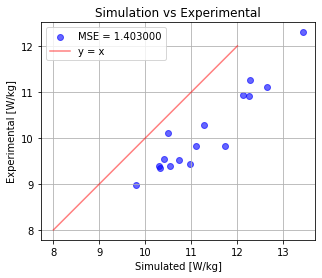

In [15]:

# make a figure for the simulations vs exp
f, ax = plt.subplots()
tempx = bothtrim_df['metabolics_all_avg_mean_x']
tempy = bothtrim_df['metabolics_all_avg_mean_y']
mse = mean_squared_error(tempy, tempx)
ax.scatter(tempx, tempy, marker='o', alpha=0.6, c='blue', label='MSE = %f'%mse)
# line = mlines.Line2D([0,1], [0,1], color='red')
# transform = ax.transAxes
# line.set_transform(transform)
# ax.add_line(line)
unitx = np.linspace(8,12,100)
ax.plot(unitx,unitx,color='red',alpha=0.5, label='y = x')
# some nice 
ax.set_title('Simulation vs Experimental')
# plt.xlim([8, 13])
# plt.ylim([8, 13])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlabel('Simulated [W/kg]')
plt.ylabel('Experimental [W/kg]')
plt.legend()
# plt.show()

In [16]:
# make a figure for exo vs natural stance and swing
# thinking box plots
# pdb.set_trace()

swingexo = np.array([])
swingnatural = np.array([])
stanceexo = np.array([])
stancenatural = np.array([])

# split the swings up
for i, row in swing_df.iterrows():
    # print(i)
    # print(row)
    tempcond = row['condname']
    if 'welkexo' in tempcond:
        swingexo = np.append(swingexo, row['metabolics_swing_avg_mean'])
    elif 'welknatural' in tempcond:
        swingnatural = np.append(swingnatural, row['metabolics_swing_avg_mean'])
for i, row in stance_df.iterrows():
    # print(i)
    # print(row)
    tempcond = row['condname']
    if 'welkexo' in tempcond:
        stanceexo = np.append(stanceexo, row['metabolics_stance_avg_mean'])
    elif 'welknatural' in tempcond:
        stancenatural = np.append(stancenatural, row['metabolics_stance_avg_mean'])


In [17]:
# function for setting the colors of the box plots pairs
colordark = '#AB82FF'
colorlight = '#FF7F00'

def setBoxColors(bp):

    setp(bp['boxes'][1], color=colordark)
    setp(bp['caps'][2], color=colordark)
    setp(bp['caps'][3], color=colordark)
    setp(bp['whiskers'][2], color=colordark)
    setp(bp['whiskers'][3], color=colordark)
    setp(bp['fliers'][0], color=colordark)
    setp(bp['fliers'][1], color=colordark)
    setp(bp['medians'][1], color=colordark)

    setp(bp['boxes'][0], color=colorlight)
    setp(bp['caps'][0], color=colorlight)
    setp(bp['caps'][1], color=colorlight)
    setp(bp['whiskers'][0], color=colorlight)
    setp(bp['whiskers'][1], color=colorlight)
    setp(bp['fliers'][0], color=colorlight)
    setp(bp['fliers'][1], color=colorlight)
    setp(bp['medians'][0], color=colorlight)


!!! Need to change this to only get the one leg and not the double !!!

 We really are only showing the results of one leg


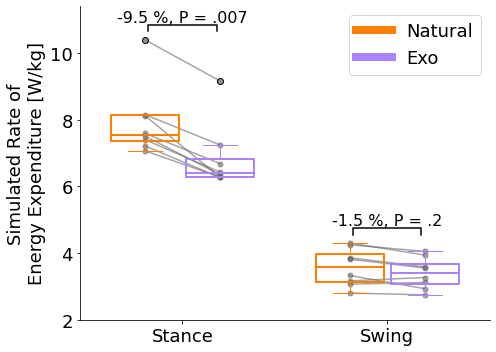

In [18]:
print("!!! Need to change this to only get the one leg and not the double !!!\n\n We really are only showing the results of one leg")

swings = [swingnatural, swingexo]
stances = [stancenatural, stanceexo]


# pdb.set_trace()
fig = figure(figsize=(7,5))
ax = axes()
#hold(True)

boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2)
meanprops = dict(linewidth=2)
flierprops = dict(linewidth=2)


# first pair - stance
bp = boxplot(stances, positions=[0.95,2.05], widths=1, zorder=100, 
             boxprops=boxprops, 
             meanprops=meanprops, 
             medianprops=medianprops,
            flierprops=flierprops)
setBoxColors(bp)
# second pair - swing
bp = boxplot(swings, positions=[3.95,5.05], widths=1, zorder=105,
            boxprops=boxprops, 
             meanprops=meanprops, 
             medianprops=medianprops,
            flierprops=flierprops)
setBoxColors(bp)
# set axes limits and labels
xlim(0,6)
ylim(2,np.max(stances_natural)['metabolics_stance_avg_mean']+1)


ax.set_xticks([1.5, 4.5])
# ax.set_xticklabels(['Stance\n{}% Avg. Difference', 'Swing\n{}% Avg. Difference'.format(stance_perc_change,swing_perc_change)],fontsize=24)
ax.set_xticklabels(['Stance', 'Swing'],fontsize=18)
# ax.yticks(fontsize=24)
# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1],'-',color=colorlight, lw=8)
hR, = plot([1,1],'-',color=colordark, lw=8)
plt.legend((hB, hR),('Natural', 'Exo'),fontsize=18)
plt.ylabel('Simulated Rate of\nEnergy Expenditure [W/kg]',fontsize=18)
plt.yticks(fontsize=18)
hB.set_visible(False)
hR.set_visible(False)
# plt.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

colorsjit = ['red', 'blue']
for i in [1,2]: # ,4,5]:
    y = stances[i-1] # titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    # x = np.random.normal(i, 0.0, size=len(y))
    x = [.95*np.ones(len(y)), 2.05*np.ones(len(y))]
    plot(x[i-1], y, '.', alpha=0.6, color='dimgrey', zorder=20, markersize=10) # color=colorsjit[i-1])
for i in [4,5]:
    y = swings[i-4]
    # x = np.random.normal(i, 0.0, size=len(y))
    # need a different x value
    x = [3.95*np.ones(len(y)), 5.05*np.ones(len(y))]
    plot(x[i-4], y, '.', alpha=0.6, color='dimgrey', zorder=50, markersize=10) # color=colorsjit[i-4])

# figure out subject lines across conditions
x_stances = [0.95*np.ones(len(stances[0])), 2.05*np.ones(len(stances[1]))]
x_swings = [3.95*np.ones(len(stances[0])), 5.05*np.ones(len(stances[1]))]

plot(x_stances, stances, color='dimgrey', zorder=-100, alpha=0.6)
plot(x_swings, swings, color='dimgrey', zorder=-100, alpha=0.6)

# now figure out the bracket
x1, x2 = 1,2
y, h, col =  np.max(stances_natural)['metabolics_stance_avg_mean']+0.25, 0.2, 'black'
plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], color=col)
plt.text((x1+x2)*.5, y+h, '%.1f %%, P = .007'%stance_perc_change, ha='center', va='bottom', color=col,
        fontsize=16)

x3, x4 = 4,5
y2, h2, col2 = np.max(swings_natural)['metabolics_swing_avg_mean']+0.25, 0.2, 'black'
plt.plot([x3,x3,x4,x4], [y2, y2+h2, y2+h2, y2], color=col2)
plt.text((x3+x4)*.5, y2+h2, '%.1f %%, P = .2'%swing_perc_change, ha='center', va='bottom', color=col2,
        fontsize=16)

plt.tight_layout()

fname = os.path.join(repobasedir, '..\\analysis\\figure1_stancevsswing.png')
plt.savefig(fname, dpi=300)

In [19]:
repobasedir
np.max(stances_natural)
print(np.max(stances_natural)['metabolics_stance_avg_mean'])


10.399933409321974


In [18]:
x_stances


[array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]),
 array([2.05, 2.05, 2.05, 2.05, 2.05, 2.05, 2.05, 2.05])]

In [19]:
stances

[array([ 7.21730862,  7.59330585,  7.29781652,  8.13502057,  7.40271345,
         8.61880258, 11.18105999, 10.06310853]),
 array([6.27054733, 6.68774088, 6.1681259 , 8.14572704, 7.2072394 ,
        7.34737704, 9.59364044, 7.53589504])]